In [230]:
import numpy as np
from time import perf_counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.7)

In [202]:
class Cube:
    SOLVED_CUBE = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    
    def __init__(self): 
        self.cube = self.SOLVED_CUBE.copy()
        self.shuffle()

    def is_solved(self):
        return np.array_equal(self.cube, self.SOLVED_CUBE)

    def shuffle(self):
        self.cube = self.cube.flatten()
        np.random.shuffle(self.cube)
        self.cube = self.cube.reshape(self.SOLVED_CUBE.shape)

    def swap(self, ax, ay, bx, by):
        self.cube[(ax, ay)], self.cube[(bx, by)] = self.cube[(bx, by)], self.cube[(ax, ay)]

    def __repr__(self):
        return str(self.cube)

[[3 1 3]
 [1 2 1]
 [3 2 2]]

In [207]:
class Solver:
    def __init__(self, cube):
        self.cube = cube
        self.counter = None
        self.timer = None

    def solve(self, verbose=False):
        self.counter = 0
        self.timer = 0
        tic = perf_counter()
        while self.cube.is_solved() == False:
            self.cube.swap(*np.random.randint(0, 3, 4))
            self.counter += 1
        toc = perf_counter()
        self.timer = toc - tic

In [250]:
c = Cube()
s = Solver(c)
results = []

for i in range(1000):
    s.cube.shuffle()
    s.solve()
    results.append((s.counter, s.timer))

df = pd.DataFrame(data=results, columns=['counter' ,'timer'])
df.describe()

,counter,timer
count,1000.000000,1000.000000
mean,2651.124000,0.131966
std,2667.945408,0.136503
min,0.000000,0.000014
25%,762.500000,0.037046
50%,1830.000000,0.089878
75%,3544.000000,0.176109
max,18162.000000,1.012843


<Axes: xlabel='counter', ylabel='Count'>

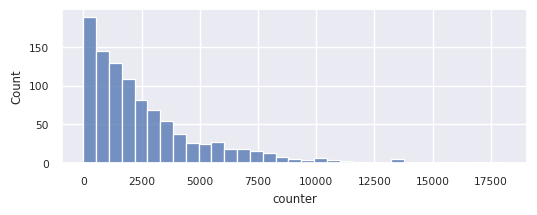

In [245]:
plt.figure(figsize=(6, 2))
sns.histplot(df.counter)